# Problem statement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Amol purkar\Desktop\CAPSTON project insurance\fraud_insurance_claims.csv")

In [3]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16 00:00:00,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05 00:00:00,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17 00:00:00,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18 00:00:00,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [4]:
data.shape

(1000, 39)

 months_as_customer: It denotes the number of months for which the customer is associated with the insurance company.
 
⦁ age: continuous. It denotes the age of the person.

⦁ policy_number: The policy number.

⦁ policy_bind_date: Start date of the policy.

⦁ policy_state: The state where the policy is registered.

⦁ policy_csl-combined single limits. How much of the bodily injury will be covered from the total damage.

⦁ policy_deductable: The amount paid out of pocket by the policy-holder before an insurance provider will pay any expenses.

⦁ policy_annual_premium: The yearly premium for the policy.

⦁ umbrella_limit: An umbrella insurance policy is extra liability insurance coverage that goes beyond the limits of the insured's homeowners, auto, or watercraft insurance. It provides an additional layer of security to those who are at risk of being sued for damages to other people's property or injuries caused to others in an accident.

⦁ insured_zip: The zip code where the policy is registered.

⦁ insured_sex: It denotes the person's gender.

⦁ insured_education_level: The highest educational qualification of the policy-holder.

⦁ insured_occupation: The occupation of the policy-holder.

⦁ insured_hobbies: The hobbies of the policy-holder.

⦁ insured_relationship: Dependents on the policy-holder.

⦁ capital-gain: It denotes the monitory gains by the person.

⦁ capital-loss: It denotes the monitory loss by the person.

⦁ incident_date: The date when the incident happened.

⦁ incident_type: The type of the incident.

⦁ collision_type: The type of collision that took place.

⦁ incident_severity: The severity of the incident.


⦁ authorities_contacted: Which authority was contacted.

⦁ incident_state: The state in which the incident took place.

⦁ incident_city: The city in which the incident took place.

⦁ incident_location: The street in which the incident took place.

⦁ incident_hour_of_the_day: The time of the day when the incident took place.

⦁ property_damage: If any property damage was done.

⦁ bodily_injuries: Number of bodily injuries.

⦁ Witnesses: Number of witnesses present.

⦁ police_report_available: Is the police report available.

⦁ total_claim_amount: Total amount claimed by the customer.

⦁ injury_claim: Amount claimed for injury

⦁ property_claim: Amount claimed for property damage.

⦁ vehicle_claim: Amount claimed for vehicle damage.

⦁ auto_make: The manufacturer of the vehicle

⦁ auto_model: The model of the vehicle.

⦁ auto_year: The year of manufacture of the vehicle.

Target Label:
Whether the claim is fraudulent or not.
⦁ fraud_reported: Y or N

In [5]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# Missing values

In [6]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<AxesSubplot:>

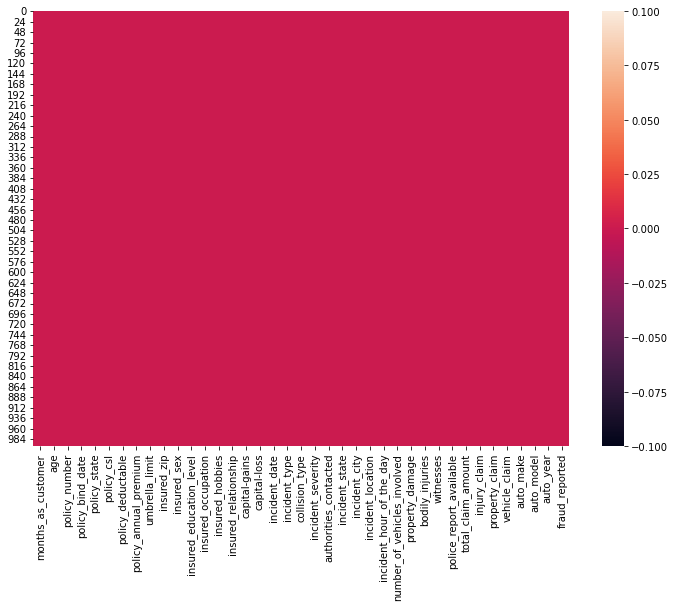

In [7]:

plt.figure(figsize=(12,8))
sns.heatmap(data.isnull())

In [8]:
# no missing values i.e Data is Clean

In [9]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [10]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# Exploratory Data Analysis

In [11]:
catg_features=[col for col in data.columns if data[col].dtypes=='object']
cont_features=[col for col in data.columns if data[col].dtypes!='object']

In [12]:
print('Number of Categorical features:', len(catg_features))
print('Number of Continuous features:' ,len(cont_features))

Number of Categorical features: 21
Number of Continuous features: 18


([<matplotlib.patches.Wedge at 0x2426b5923d0>,
 [Text(-0.13259044265487685, 1.0919797500487745, 'Categorical'),
  Text(0.13259054489339886, -1.0919797376347566, 'Continuous')],
 [Text(-0.07232205962993281, 0.5956253182084223, '53.8%'),
  Text(0.07232211539639936, -0.5956253114371399, '46.2%')])

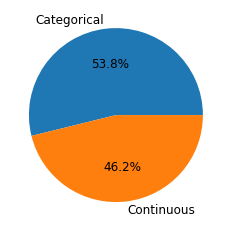

In [13]:

plt.pie([len(catg_features),
len(cont_features)],
labels=['Categorical','Continuous'],
textprops={'fontsize':12},
autopct='%1.1f%%')

In [14]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# Target Variable - Fraud Detected

In [15]:
data.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [16]:
plt.figure(figsize=(8,8))


<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

Text(0, 0.5, 'Percentage')

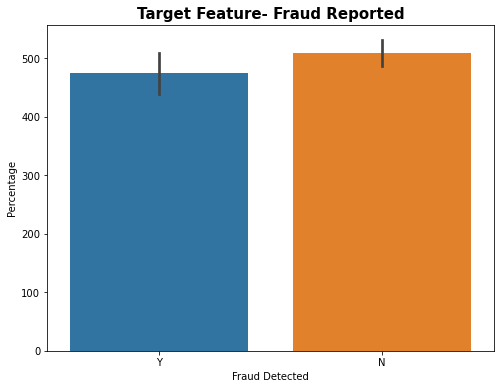

In [17]:
plt.figure(figsize=(8,6))
plt.title("Target Feature- Fraud Reported",fontdict={'fontweight':'bold','fontsize':15})
sns.barplot(x=data.fraud_reported.values,y=data.fraud_reported.index)
plt.xlabel('Fraud Detected')
plt.ylabel('Percentage')



Age and age vs target column

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


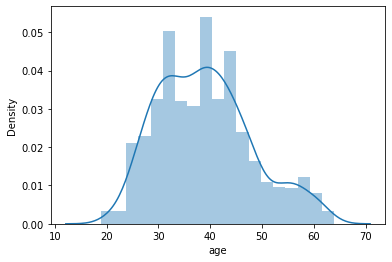

In [18]:
sns.distplot(data.age);

# policy state

In [19]:
data.policy_state.value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


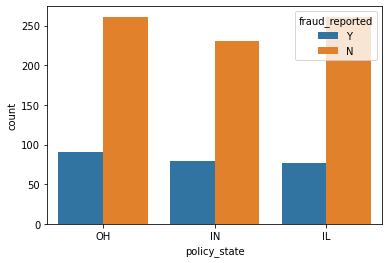

In [20]:
sns.countplot(data['policy_state'],hue=data['fraud_reported']);

# incident_state vs Tar4get variable

In [21]:
data.incident_state.value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_state', ylabel='count'>

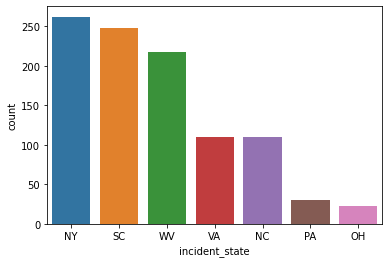

In [22]:
sns.countplot(data['incident_state'],order=data['incident_state'].value_counts().index)

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


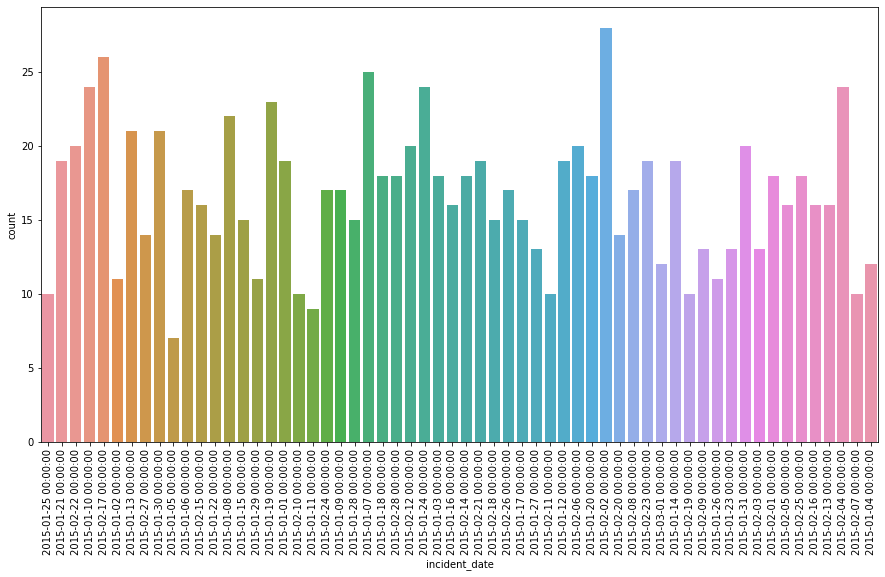

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(data['incident_date'])
plt.xticks(rotation = 90);

# incident_type vs fraud

In [24]:
data.incident_type.unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_type', ylabel='count'>

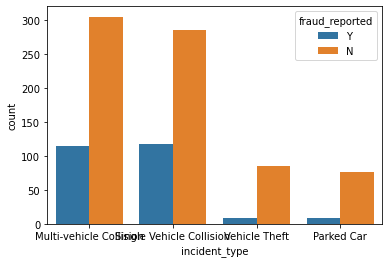

In [25]:
sns.countplot(data.incident_type,order=data.incident_type.value_counts().index,hue=data.fraud_reported)

In [26]:
data.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [27]:
data.collision_type.replace("?",np.nan,inplace=True)

In [28]:
data.collision_type.value_counts(dropna=False)

Rear Collision     292
Side Collision     276
Front Collision    254
NaN                178
Name: collision_type, dtype: int64

Text(0, 0.5, 'Percentage ')

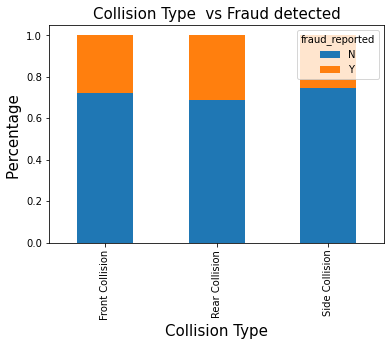

In [29]:
 table=pd.crosstab(data['collision_type'],data['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title("Collision Type  vs Fraud detected",fontsize=15)
plt.xlabel('Collision Type',fontsize=15)
plt.ylabel('Percentage ',fontsize=15)

# incident_severity

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_severity', ylabel='count'>

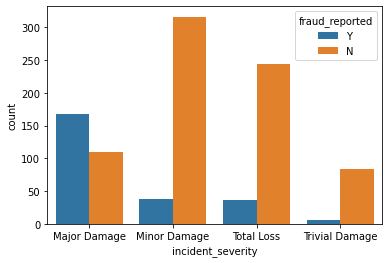

In [30]:
sns.countplot(data.incident_severity,hue=data.fraud_reported)

# authorities_contacted vs fraud_reported

In [31]:
data.authorities_contacted.value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

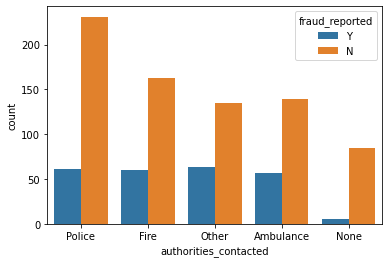

In [32]:
sns.countplot(data['authorities_contacted'], order=data['authorities_contacted'].value_counts().index,hue=data['fraud_reported'])


# number_of_vehicles_involved

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

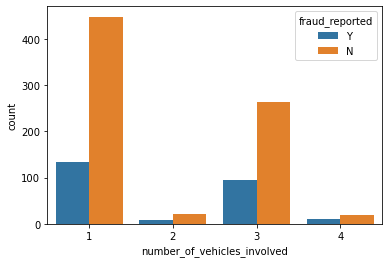

In [33]:
sns.countplot(data['number_of_vehicles_involved'], hue=data['fraud_reported'])


# property_damage

In [34]:
data['property_damage'].replace('?',np.nan, inplace=True)


C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_damage', ylabel='count'>

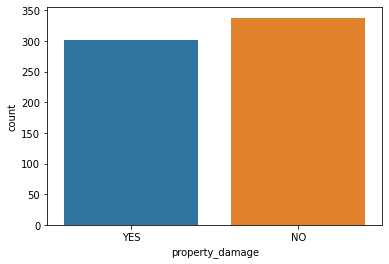

In [35]:
sns.countplot(data['property_damage'])

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_damage', ylabel='count'>

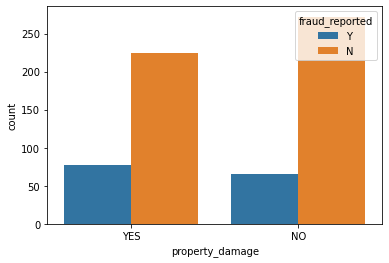

In [36]:
sns.countplot(data['property_damage'],hue=data['fraud_reported'])


# bodily_injuries

In [37]:
data.bodily_injuries.unique()

array([1, 0, 2], dtype=int64)

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

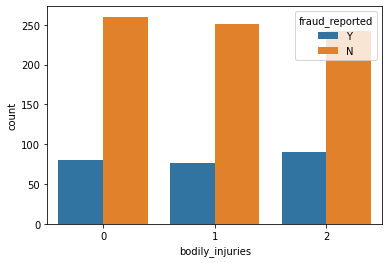

In [38]:
sns.countplot(data.bodily_injuries, hue=data.fraud_reported)

# witnesses

In [39]:
data.witnesses.unique()

array([2, 0, 3, 1], dtype=int64)

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='witnesses', ylabel='count'>

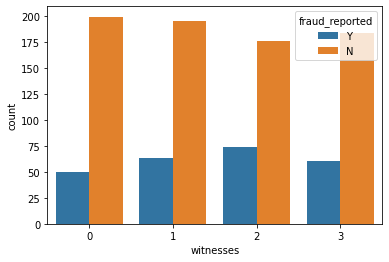

In [40]:
sns.countplot(data.witnesses,hue=data.fraud_reported)

# police_report_available

In [41]:
data.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='police_report_available', ylabel='count'>

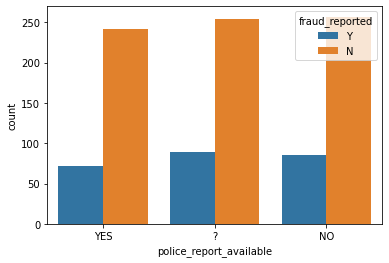

In [42]:
sns.countplot(data.police_report_available,hue=data.fraud_reported)

# Vehicle Detail
auto_make

In [43]:
data.auto_make.unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


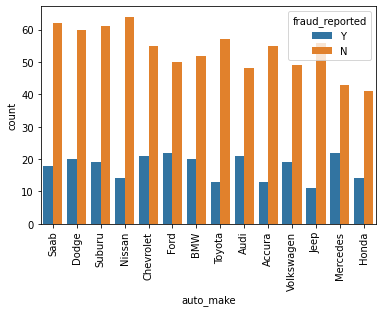

In [44]:
sns.countplot(data['auto_make'],order=data['auto_make'].value_counts().index, hue=data['fraud_reported'])
plt.xticks(rotation=90);

# auto_model

In [45]:
data.auto_model.unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

Text(0.5, 1.0, 'Auto Model  vs Fraud Case')

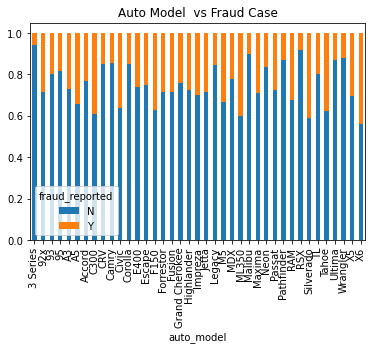

In [46]:
table=pd.crosstab(data['auto_model'],data['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Auto Model  vs Fraud Case')

# auto_year

In [47]:
data.auto_year.unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013],
      dtype=int64)

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


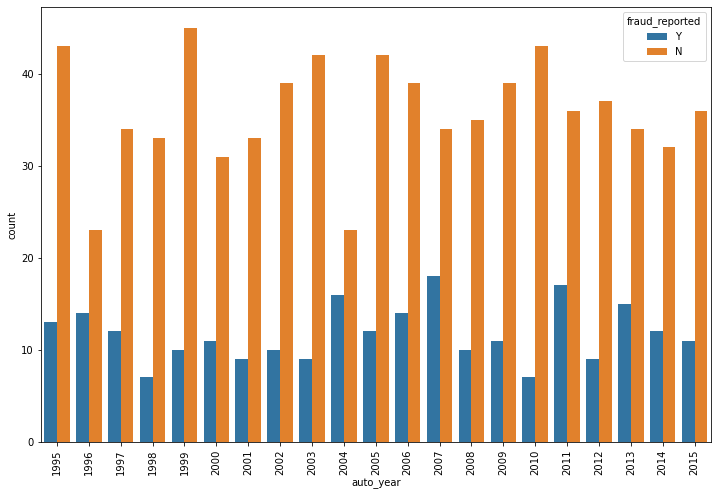

In [48]:
plt.figure(figsize=(12,8))
sns.countplot(data['auto_year'],hue=data['fraud_reported'])
plt.xticks(rotation=90);

# Insured Person Exploratory Analysis

In [49]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [50]:
data.insured_sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

([<matplotlib.patches.Wedge at 0x2426c322b20>,
 [Text(-0.12757508092656847, 1.0925770447554624, 'FEMALE'),
  Text(0.12757508092656858, -1.0925770447554624, 'MALE')],
 [Text(-0.06958640777812825, 0.5959511153211613, '53.70%'),
  Text(0.0695864077781283, -0.5959511153211613, '46.30%')])

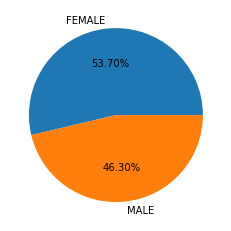

In [51]:
plt.pie(data.insured_sex.value_counts().values,labels=data.insured_sex.value_counts().index,autopct="%1.2f%%")

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insured_sex', ylabel='count'>

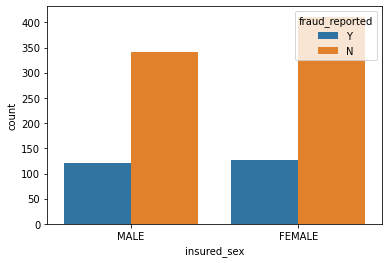

In [52]:
sns.countplot(data.insured_sex,hue=data.fraud_reported)

# insured_education_level

In [53]:
data.insured_education_level.unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

<AxesSubplot:xlabel='insured_education_level'>

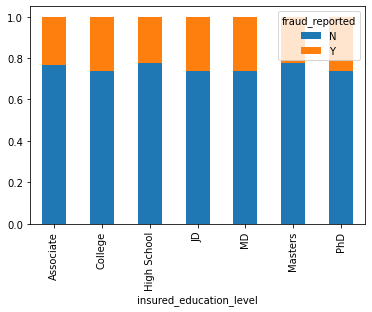

In [54]:

table=pd.crosstab(data['insured_education_level'],data['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

# insured_occupation

<AxesSubplot:xlabel='insured_occupation'>

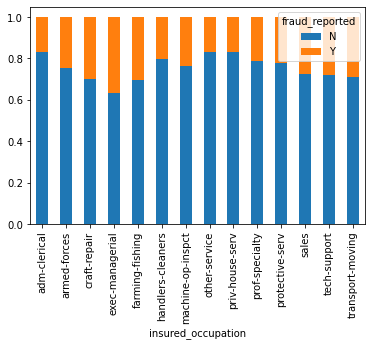

In [55]:
table=pd.crosstab(data['insured_occupation'],data['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

# insured_hobbies

In [56]:
data.insured_hobbies.unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'reading'),
  Text(1, 0, 'exercise'),
  Text(2, 0, 'paintball'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'movies'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'kayaking'),
  Text(8, 0, 'yachting'),
  Text(9, 0, 'hiking'),
  Text(10, 0, 'video-games'),
  Text(11, 0, 'skydiving'),
  Text(12, 0, 'base-jumping'),
  Text(13, 0, 'board-games'),
  Text(14, 0, 'polo'),
  Text(15, 0, 'chess'),
  Text(16, 0, 'dancing'),
  Text(17, 0, 'sleeping'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'basketball')])

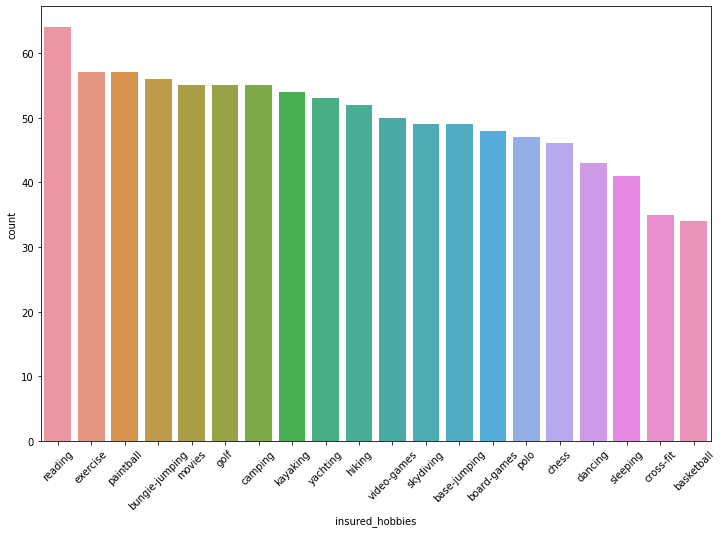

In [57]:
plt.figure(figsize=(12,8))
sns.countplot(data['insured_hobbies'],order=data['insured_hobbies'].value_counts().index)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='insured_hobbies'>

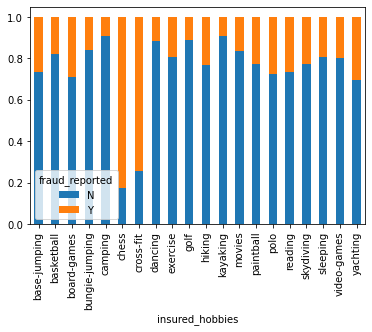

In [58]:
table=pd.crosstab(data['insured_hobbies'],data['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

# insured_relationship

In [59]:
data.insured_relationship.unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

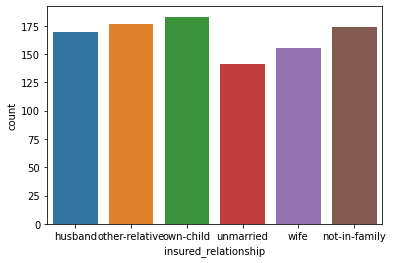

In [60]:
 sns.countplot(data['insured_relationship'])

# capital-gains

In [61]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [62]:
data = data.rename(columns={'capital-gains': 'capital_gains'})

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital_gains', ylabel='Density'>

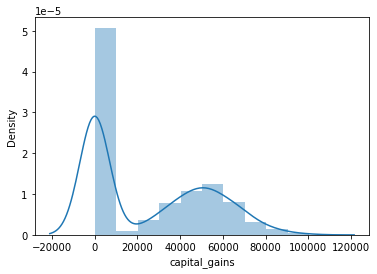

In [63]:
sns.distplot(data['capital_gains'])


In [64]:
data['policy_deductable'].unique()

array([1000, 2000,  500], dtype=int64)

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

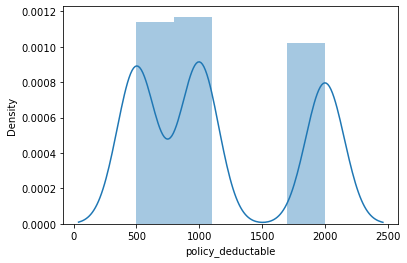

In [65]:

sns.distplot(data['policy_deductable'])

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

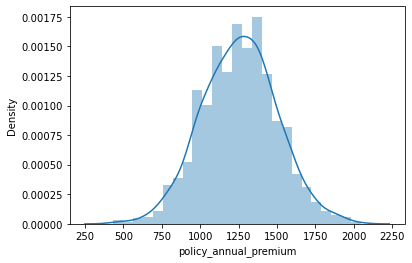

In [66]:
sns.distplot(data['policy_annual_premium'])


In [67]:

data['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '-1000000'),
  Text(1, 0, '0'),
  Text(2, 0, '2000000'),
  Text(3, 0, '3000000'),
  Text(4, 0, '4000000'),
  Text(5, 0, '5000000'),
  Text(6, 0, '6000000'),
  Text(7, 0, '7000000'),
  Text(8, 0, '8000000'),
  Text(9, 0, '9000000'),
  Text(10, 0, '10000000')])

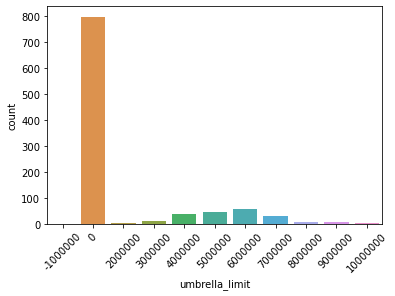

In [68]:
sns.countplot(data['umbrella_limit'])
plt.xticks(rotation=45)

# insured_zip

In [69]:
data.insured_zip.value_counts()

477695    2
469429    2
446895    2
431202    2
456602    2
         ..
476303    1
450339    1
476502    1
600561    1
612260    1
Name: insured_zip, Length: 995, dtype: int64

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

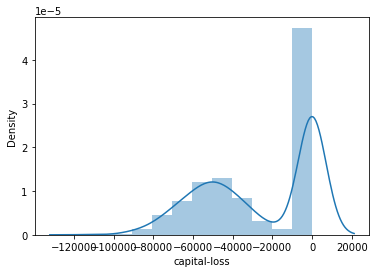

In [70]:

sns.distplot(data['capital-loss'])

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'AGE')

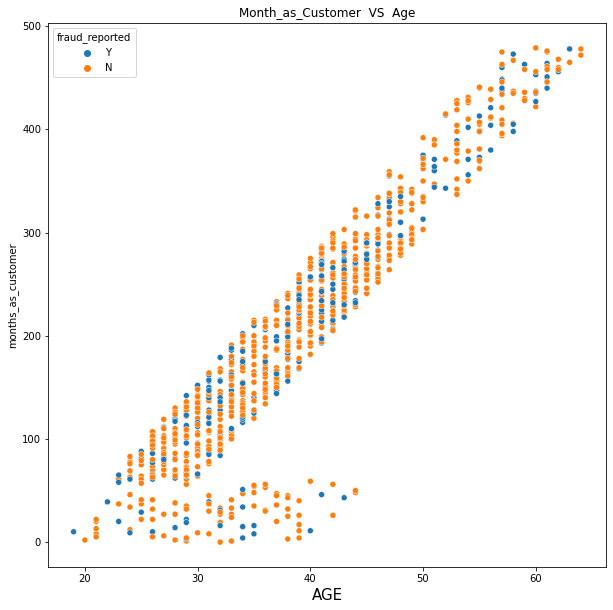

In [71]:
plt.figure(figsize=(10,10))
sns.scatterplot('age','months_as_customer',hue='fraud_reported',data=data)
plt.title('Month_as_Customer  VS  Age')
plt.xlabel('AGE',fontsize=15)


C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'policy_deductable')

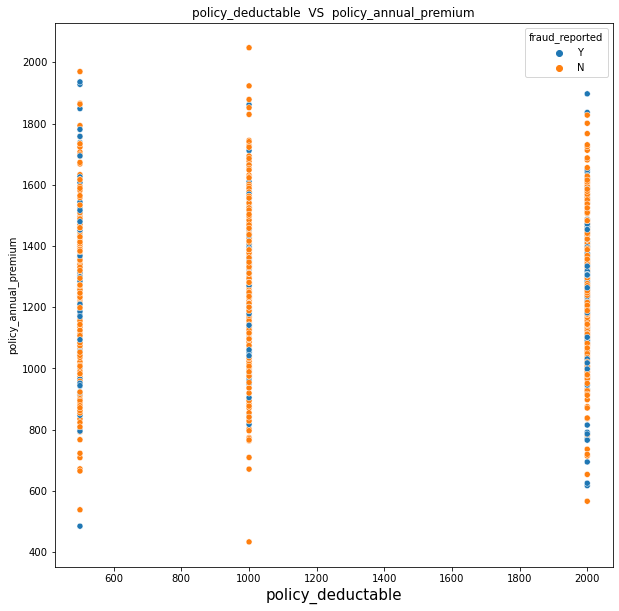

In [72]:
plt.figure(figsize=(10,10))
sns.scatterplot('policy_deductable','policy_annual_premium',hue='fraud_reported',data=data)
plt.title('policy_deductable  VS  policy_annual_premium')
plt.xlabel('policy_deductable',fontsize=15)

C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'capital-loss')

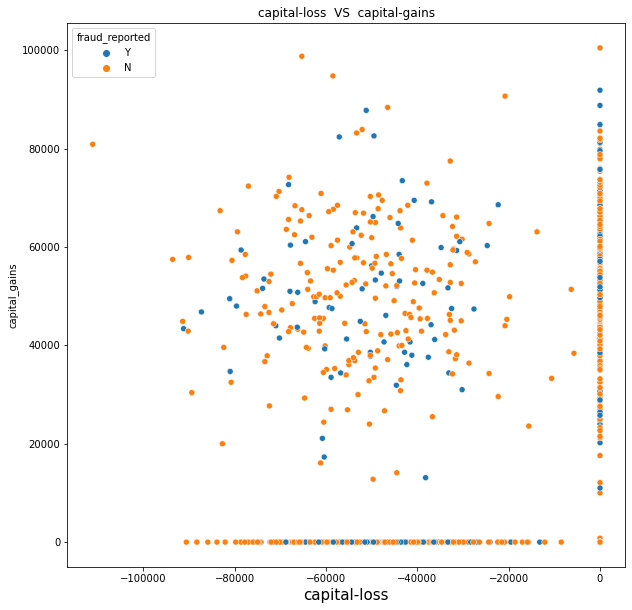

In [73]:
plt.figure(figsize=(10,10))
sns.scatterplot('capital-loss','capital_gains',hue='fraud_reported',data=data)
plt.title('capital-loss  VS  capital-gains')
plt.xlabel('capital-loss',fontsize=15)


C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='injury_claim', ylabel='total_claim_amount'>

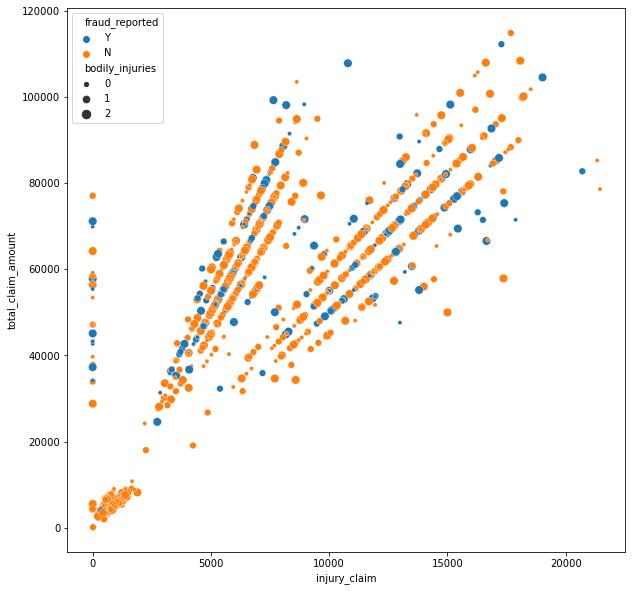

In [74]:
plt.figure(figsize=(10,10))

sns.scatterplot('injury_claim','total_claim_amount',
                hue='fraud_reported',size='bodily_injuries',data=data)


C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_claim', ylabel='total_claim_amount'>

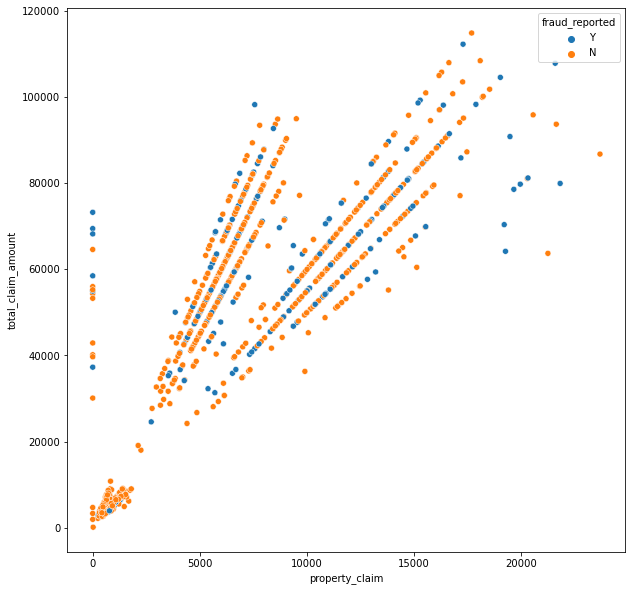

In [75]:
plt.figure(figsize=(10,10))
sns.scatterplot('property_claim','total_claim_amount',hue='fraud_reported',data=data)


C:\Users\Amol purkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicle_claim', ylabel='total_claim_amount'>

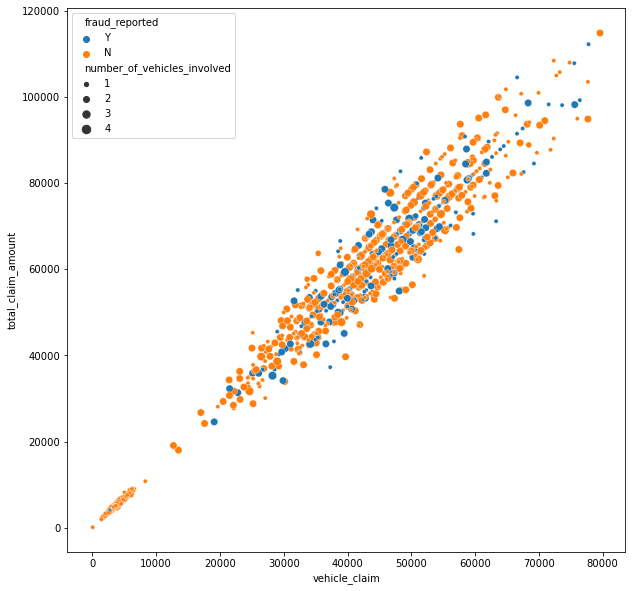

In [76]:
plt.figure(figsize=(10,10))
sns.scatterplot('vehicle_claim','total_claim_amount',
                hue='fraud_reported',size='number_of_vehicles_involved',data=data)


In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Target']=le.fit_transform(data['fraud_reported'])

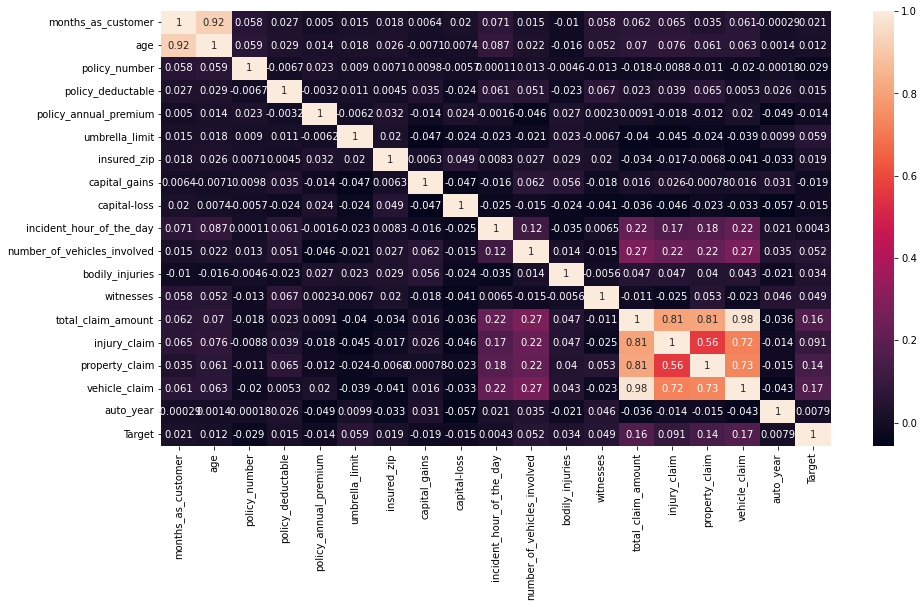

In [78]:
corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr ,annot=True)
plt.yticks(rotation=0)
plt.show()

In [79]:
# dropping unimportant columns

data = data.drop(columns = ['policy_number', 'policy_csl','insured_zip','policy_bind_date', 'incident_date', 'incident_location',
                        'auto_year'])

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_hobbies              1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  capital_gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

In [170]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [226]:
data.policy_state=le.fit_transform(data.policy_state)

In [227]:
data.insured_sex=le.fit_transform(data.insured_sex)
data.insured_education_level=le.fit_transform(data.insured_education_level)
data.insured_occupation=le.fit_transform(data.insured_occupation)
data.insured_hobbies=le.fit_transform(data.insured_hobbies)
data.insured_relationship=le.fit_transform(data.insured_relationship)
data.incident_type=le.fit_transform(data.incident_type)
data.collision_type=le.fit_transform(data.collision_type)
data.incident_severity=le.fit_transform(data.incident_severity)
data.authorities_contacted=le.fit_transform(data.authorities_contacted)
data.incident_state=le.fit_transform(data.incident_state)
data.incident_city=le.fit_transform(data.incident_city)
data.property_damage=le.fit_transform(data.property_damage)
data.police_report_available=le.fit_transform(data.police_report_available)
data.auto_make=le.fit_transform(data.auto_make)
data.auto_model=le.fit_transform(data.auto_model)
data.fraud_reported=le.fit_transform(data.fraud_reported)

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
train,test=train_test_split(data,test_size=.2)

In [260]:
data.fraud_reported.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [261]:
df1=train[train.fraud_reported==1]

In [262]:
#0df2=train[train.fraud_reported==0]

In [263]:
#train= pd.concat([train,df1,df2])

In [264]:
train_x=train.iloc[:,0:-1]
train_y=train.iloc[:,-1]

In [265]:
test_x=test.iloc[:,0:-1]
test_y=test.iloc[:,-1]

In [266]:
from sklearn.linear_model import LogisticRegression


In [267]:
log=LogisticRegression()

In [268]:
log.fit(train_x,train_y)

C:\Users\Amol purkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [269]:
pred=log.predict(test_x)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [270]:
from sklearn.metrics import confusion_matrix
                               

In [271]:
tab=confusion_matrix(test_y,pred)
tab

array([[158,   0],
       [ 41,   1]], dtype=int64)

In [272]:
from sklearn.metrics import accuracy_score

In [273]:
accuracy_score(test_y,pred)

0.795

In [274]:
from sklearn.metrics import precision_score

In [275]:
precision_score(test_y,pred)

1.0

In [276]:

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



In [277]:
LR_model= LogisticRegression()

SV_model= SVC()
KNR_model= KNeighborsClassifier()


In [278]:
model=[LR_model,SV_model,KNR_model]

accuracy=[]
f1=[]

for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    pred= m.predict(test_x)
    accuracy.append(round(accuracy_score(test_y,pred) * 100, 2))
    f1.append(round(f1_score(test_y,pred) * 100, 2))
    #print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    #print("F1 SCore                ", f1_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(test_y,pred) )
    #print(classification_report(y_test,pred))
    #print('*'*50)

Confusion Matrix of  LogisticRegression()  is 
 [[158   0]
 [ 41   1]]
Confusion Matrix of  SVC()  is 
 [[158   0]
 [ 42   0]]
Confusion Matrix of  KNeighborsClassifier()  is 
 [[141  17]
 [ 38   4]]


C:\Users\Amol purkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [279]:
pd.DataFrame({'Model':model,'Accuracy':accuracy,'F1 Score':f1})


,Model,Accuracy,F1 Score
0,LogisticRegression(),79.5,4.65
1,SVC(),79.0,0.00
2,KNeighborsClassifier(),72.5,12.70
